In [2]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline

In [3]:
import sys
sys.path.append('../lib')
from simlib import *

In [32]:
ks = [0.5, 0.7, 0.9, 1.0, 1.5, 2.0]

In [42]:
Us = []
for k in ks:
    Us.append(harmonic_potential(k=k))
D, b = 1, 1
x0 = 2

In [34]:
ts = 6*[0]
xs = 6*[0]
hist = 6*[0]
for i in range(6):
    ts[i], xs[i], hist[i], _ = simulate('test{}'.format(i), Us[i], method='langevin', num_particles=10000, x0=2,  D=D, KT=1/b, max_t=40)

In [35]:
all_means = []
all_stdev = []
for j in range(6):
    means = []
    stdev = []
    for i, t in enumerate(ts1):
        means.append(np.mean(xs[j][i]))
        stdev.append(np.std(xs[j][i]))
    all_means.append(means)
    all_stdev.append(stdev)
    
all_means = np.array(all_means)
all_stdev = np.array(all_stdev)

In [66]:
def mu(t, k):
    return x0*np.exp(-D*b*k*t)

def sig(t, k):
    return np.sqrt(1/(b*k)*(1-np.exp(-2*D*b*k*t)))

mi, ma = 0, 20
plt.xlabel = 't'

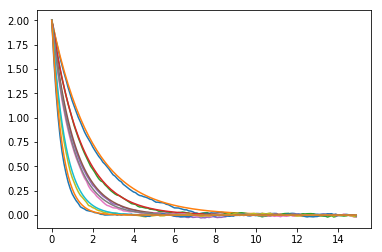

In [46]:
for t, means, k in zip(ts, all_means, ks):
    plt.plot(t[mi:ma], means[mi:ma])
    plt.plot(t[mi:ma], mu(t[mi:ma], k))

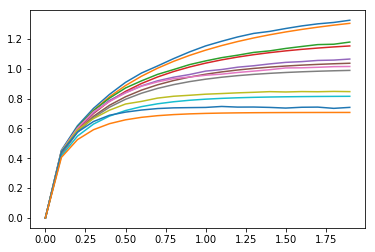

In [67]:
for t, stdev, k in zip(ts, all_stdev, ks):
    plt.plot(t[mi:ma], stdev[mi:ma])
    plt.plot(t[mi:ma], sig(t[mi:ma], k))

In [64]:
with open('../data/harmonic_means1.data', 'w') as f:
    for j, t in enumerate(ts[0]):
        f.write('{} '.format(t))
        for i in range(6):
            f.write('{} '.format(all_means[i][j]))
        f.write('\n')

In [65]:
with open('../data/harmonic_stdev1.data', 'w') as f:
    for j, t in enumerate(ts[0]):
        f.write('{} '.format(t))
        for i in range(6):
            f.write('{} '.format(all_stdev[i][j]))
        f.write('\n')